 # **PROJET : RECOMMANDATION DU TYPE DE CULTURE AGRICOLE**


# Sommaire :
 - <a href="#C1">Chargement des données</a>
 
**Partie 1 : Nettoyage du jeu de données**
 -  <a href="#C2">Analyse de la forme</a>
 - <a href="#C3">Analyse du fond</a>
 
**Partie 2 : Modélisation**
  - <a href="C4">Selection des variable</a>
- <a href="#C5">subdivision des données</a>
 - <a href="#C6">Recherche du meilleur modèle</a>
 - <a href="#C7">Evaluation du modèle</a>
 
 **Partie 3 : Prédiction**
 - <a href="#C8">Prédiction</a>

# <a name="C1"> Chargement des bibliothèques et des données</a>

In [1]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Chargement des données
data = pd.read_csv('data_agriculture.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1,13,5,8,23.853404,90.105225,7.474711,103.923226,orange
2,23,5,44,21.207254,94.263047,7.163005,107.566080,pomegranate
3,10,5,42,20.241049,91.087068,6.887006,109.253773,pomegranate
4,107,5,52,26.663461,89.984052,6.881426,57.408472,watermelon


# <a name="C2">Analyse de la forme</a>

In [3]:
# dimension du tabelau
data.shape

(2200, 8)

In [4]:
# types des colonnes
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
#description statistique du tableau
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
# repartion des données par cultures étudiées
data['label'].value_counts()

label
orange         100
pomegranate    100
grapes         100
banana         100
kidneybeans    100
lentil         100
pigeonpeas     100
blackgram      100
chickpea       100
papaya         100
maize          100
cotton         100
rice           100
mungbean       100
jute           100
mothbeans      100
mango          100
coffee         100
coconut        100
muskmelon      100
watermelon     100
apple          100
Name: count, dtype: int64

In [7]:
# Nombre de cultures etudiées
len(set(data['label']))

22

# <a name="C3">Analyse du fond</a>


In [8]:
# Recherche des valeurs nulles
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Moyenne des diffrents elements par culture
for elt in list(data.columns)[0:7]:
    print(data.groupby('label')[[elt]].mean().sort_values(elt, ascending=False))
    print('----------------')

                  N
label              
cotton       117.77
coffee       101.20
muskmelon    100.32
banana       100.23
watermelon    99.42
rice          79.89
jute          78.40
maize         77.76
papaya        49.88
chickpea      40.09
blackgram     40.02
grapes        23.18
coconut       21.98
mothbeans     21.44
mungbean      20.99
apple         20.80
kidneybeans   20.75
pigeonpeas    20.73
mango         20.07
orange        19.58
pomegranate   18.87
lentil        18.77
----------------
                  P
label              
apple        134.22
grapes       132.53
banana        82.01
lentil        68.36
chickpea      67.79
pigeonpeas    67.73
kidneybeans   67.54
blackgram     67.47
papaya        59.05
maize         48.44
mothbeans     48.01
rice          47.58
mungbean      47.28
jute          46.86
cotton        46.24
coffee        28.74
mango         27.18
pomegranate   18.75
muskmelon     17.72
watermelon    17.00
coconut       16.93
orange        16.55
----------------
      

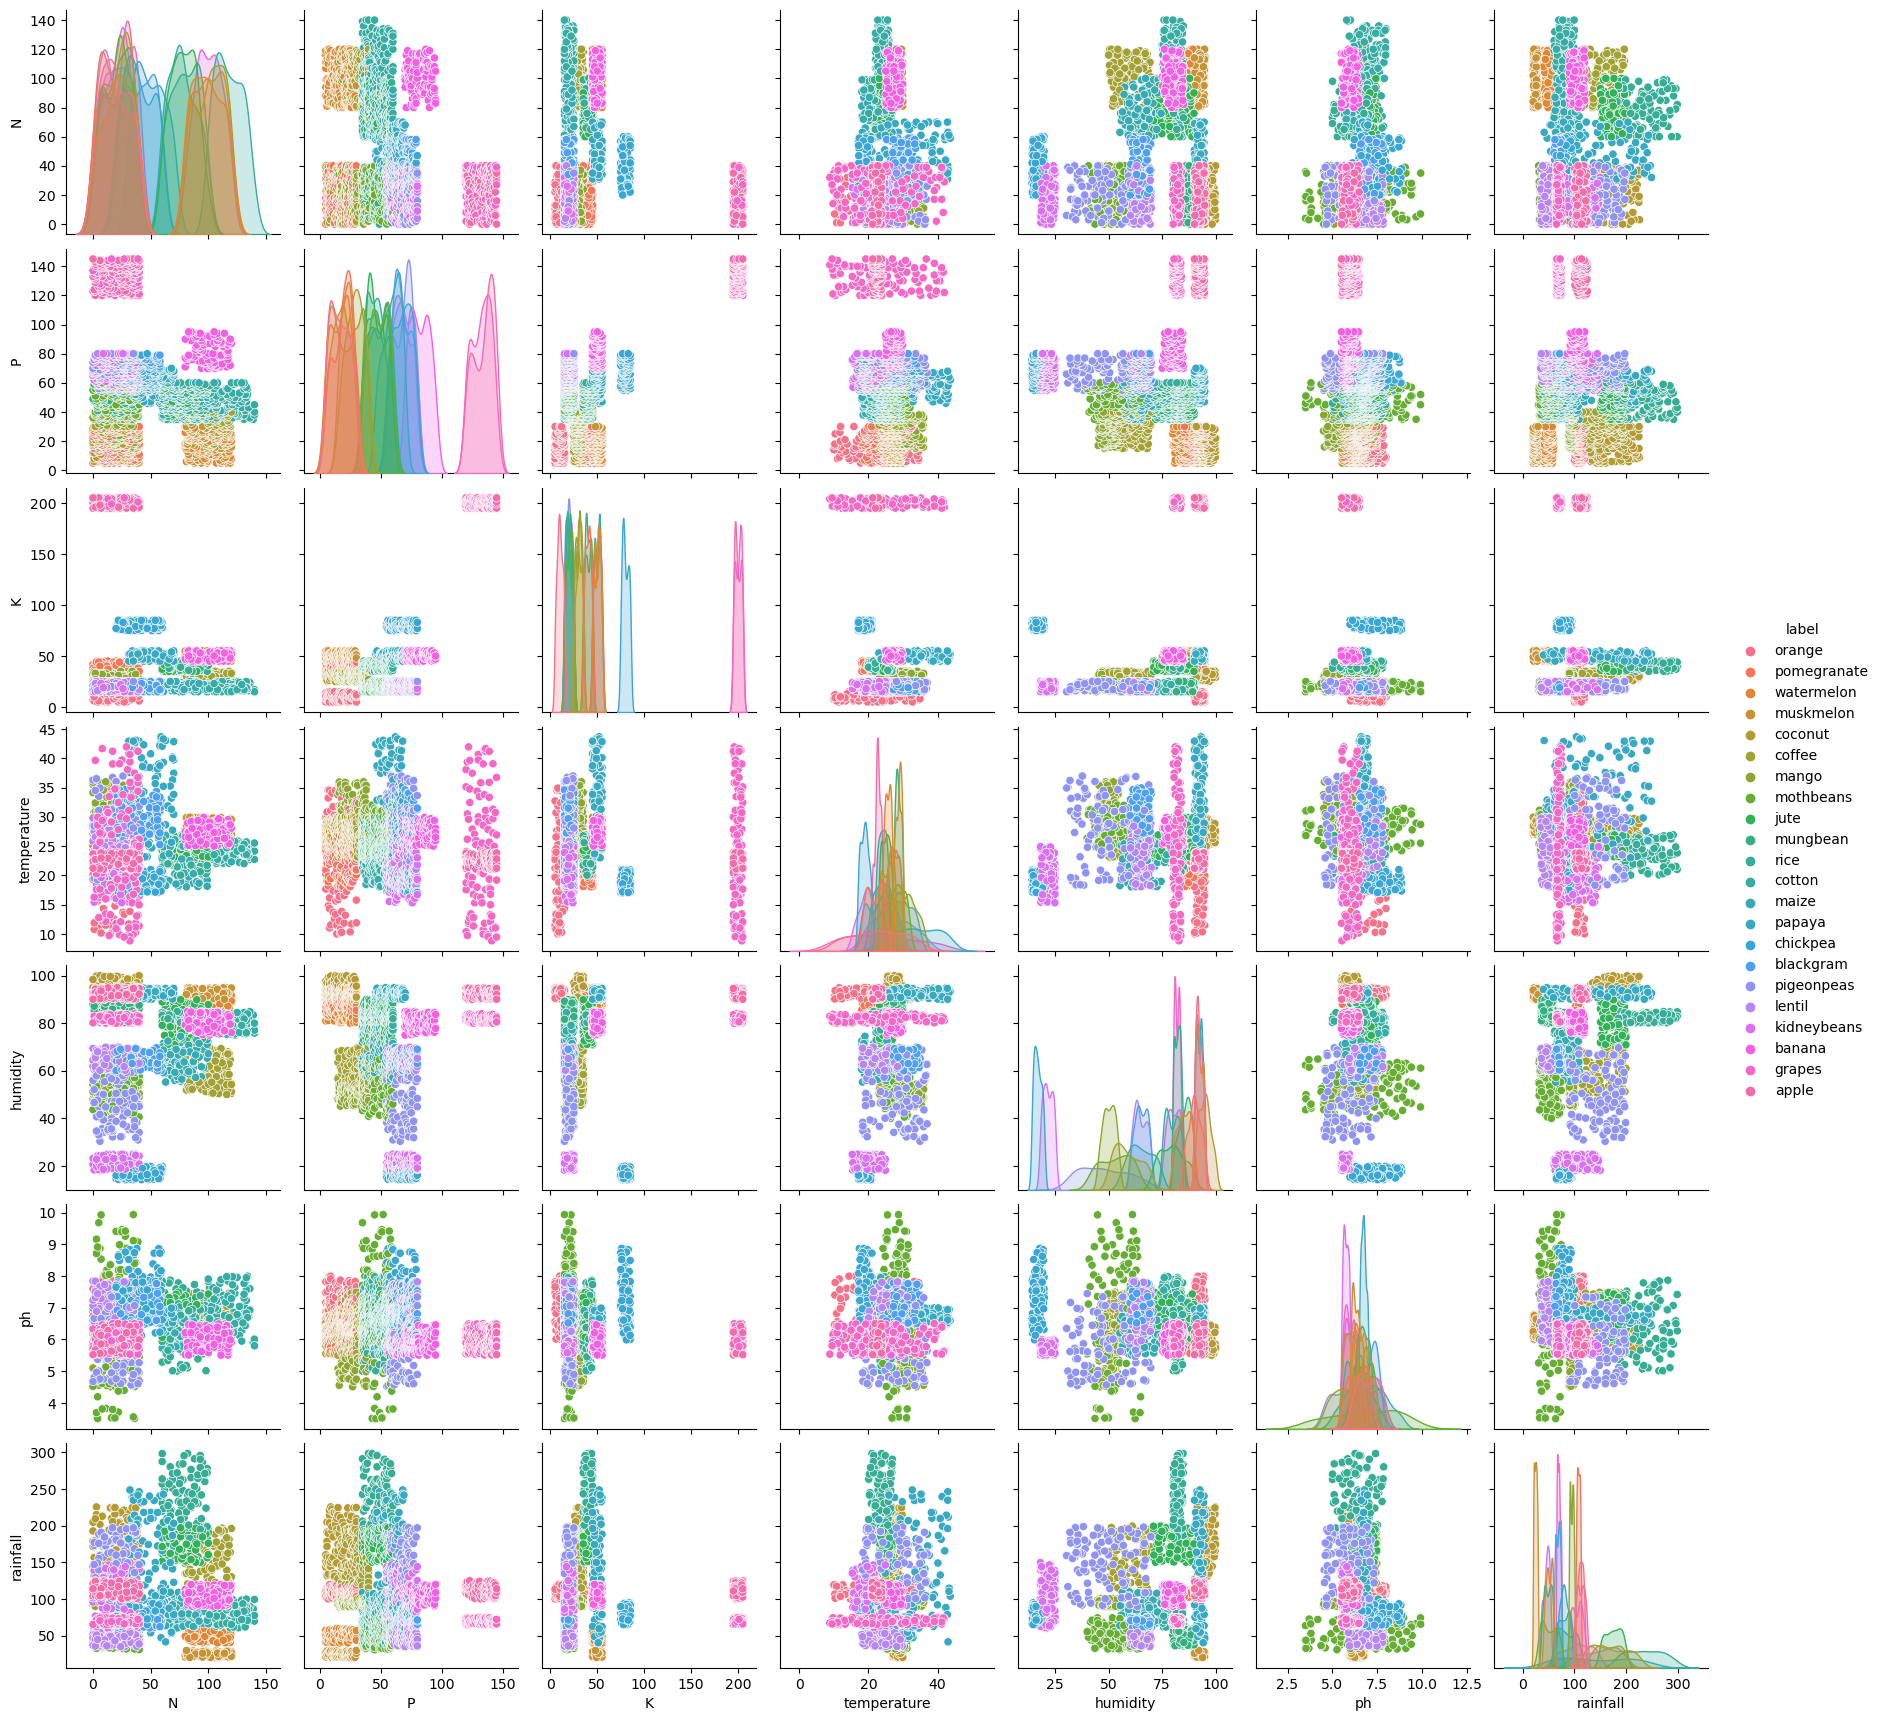

In [10]:
# Relation entre différents éléments
sns.pairplot(data,hue='label')

<Axes: xlabel='humidity', ylabel='N'>

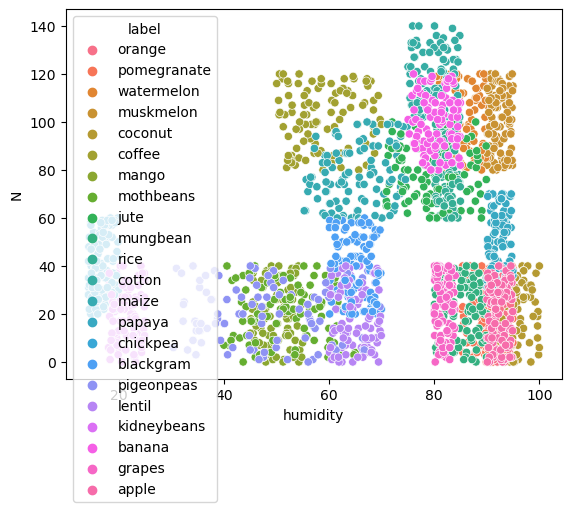

In [11]:
sns.scatterplot(x=data['humidity'], y=data['N'], hue=data['label'])

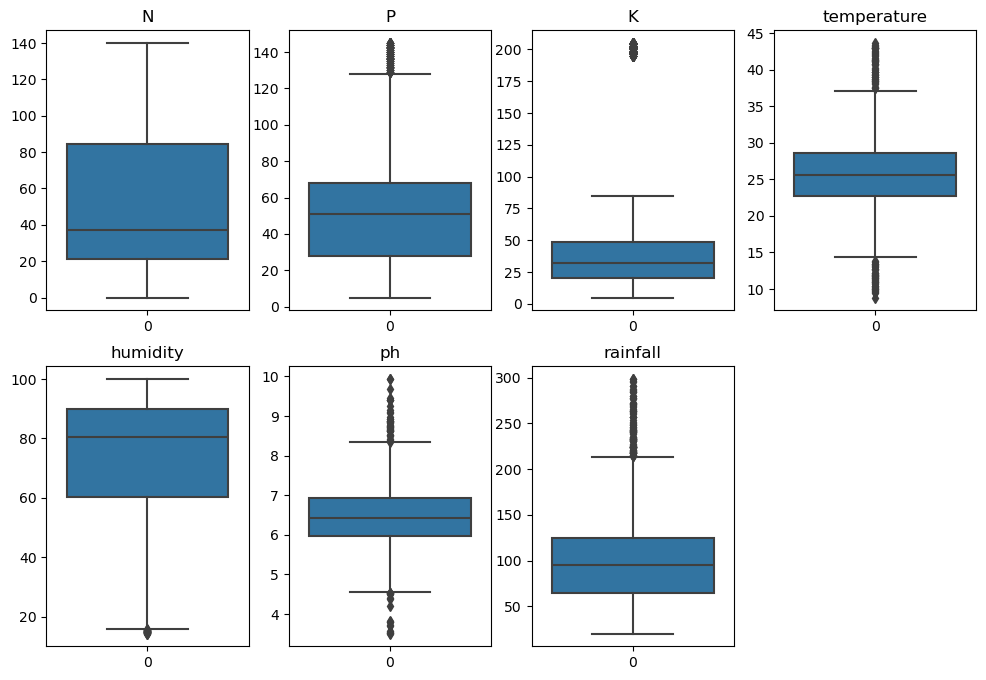

In [12]:
# Vérification des valeurs abérrantes
plt.figure(figsize=(12,8))
for i in range(len(data.columns)-1):
    plt.subplot(2,4,i+1)
    sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])

# <a name="C4">Selection des variable</a>

In [13]:
# Selection des variable
X = data.drop('label', axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,10,5,5,21.213070,91.353492,7.817846,112.983436
1,13,5,8,23.853404,90.105225,7.474711,103.923226
2,23,5,44,21.207254,94.263047,7.163005,107.566080
3,10,5,42,20.241049,91.087068,6.887006,109.253773
4,107,5,52,26.663461,89.984052,6.881426,57.408472


In [14]:
y=data['label']
y.head()

0         orange
1         orange
2    pomegranate
3    pomegranate
4     watermelon
Name: label, dtype: object

# <a name="C5">subdivision des données</a>

In [15]:
# Subdivision des données
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

# <a name="C6">Entrainement des modèles</a>

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Normalisation 
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)


In [18]:
#Définition des modèles
models = {
    'Regression logistic': LogisticRegression(),
    'Naive bayesienne' : GaussianNB(),
    'SVM' : SVC(),
    'KNN': KNeighborsClassifier()
         }

In [19]:
# Définition de la grille des paramètres
params = {
    'Regression logistic':{},
    'Naive bayesienne' :{},
    'SVM' : {},
    'KNN' : {'n_neighbors':[3,5,7,9],'metric':['euclidean','manhattan','chebyshev']}
    
         }

In [20]:
# Liste de tuple contenant les modeles et leurs paramètres
model_params = [( model, params[name]) for name , model in models.items()]
model_params

[(LogisticRegression(), {}),
 (GaussianNB(), {}),
 (SVC(), {}),
 (KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7, 9],
   'metric': ['euclidean', 'manhattan', 'chebyshev']})]

# <a name="C6">Recherche du meilleur modèle</a>

In [21]:
best_model = None
best_score = 0
for  model, param_grid in model_params:
    grid_search = GridSearchCV(model,param_grid, cv=5)
    grid_search.fit(X_norm_train,y_train)
    if grid_search.best_score_ > best_score :
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
print('Meilleur modèle:', best_model)
print('Meilleur score :', best_score)

Meilleur modèle: GaussianNB()
Meilleur score : 0.9943181818181819


# <a name="C7">Evaluation du modèle</a>

In [23]:
def evaluation (model):
    y_pred = model.predict(X_norm_test)
    print('Modèle : ', best_model )
    print('Précision : ', classification_report(y_test,y_pred, output_dict=True)['weighted avg']['precision'])
    print('Rappel : ', classification_report(y_test,y_pred, output_dict=True)['weighted avg']['recall'])
    print('f1-score : ', classification_report(y_test,y_pred, output_dict=True)['weighted avg']['f1-score'])
    print('---------------------Matrice de confusion--------------------')
    print(confusion_matrix(y_test,y_pred))
 


In [24]:
evaluation(best_model)

Modèle :  GaussianNB()
Précision :  0.9896942092994724
Rappel :  0.9886363636363636
f1-score :  0.9886300818880308
---------------------Matrice de confusion--------------------
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0

# <a name="C8">Prédiction</a>

In [25]:
def prediction(valeurs):
    for elt in valeurs:
        result = best_model.predict(scaler.transform(np.array(elt).reshape(1,7)))
        print(elt, '------>', result[0])

In [26]:
liste = [[20,100,200,22,80,7,110],[10,5,7,20,80,7,100],[100,80,50,25,80,6,100]]

In [27]:
prediction(liste)

[20, 100, 200, 22, 80, 7, 110] ------> apple
[10, 5, 7, 20, 80, 7, 100] ------> orange
[100, 80, 50, 25, 80, 6, 100] ------> banana


In [29]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1,13,5,8,23.853404,90.105225,7.474711,103.923226,orange
2,23,5,44,21.207254,94.263047,7.163005,107.566080,pomegranate
3,10,5,42,20.241049,91.087068,6.887006,109.253773,pomegranate
4,107,5,52,26.663461,89.984052,6.881426,57.408472,watermelon
...,...,...,...,...,...,...,...,...
2195,29,145,205,22.812276,92.129921,6.212303,109.338355,apple
2196,16,145,199,26.916248,80.768389,5.953966,69.309272,grapes
2197,27,145,205,9.467960,82.293355,5.800243,66.027652,grapes
2198,39,145,201,36.731266,80.589319,5.775600,72.242308,grapes
